In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
main_df = pd.read_csv("/content/water_potability.csv")
df = main_df.copy()

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(df.shape)

(3276, 10)


In [ ]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690300,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833605,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64


In [ ]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [ ]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

ph              Solids        0.051277
Hardness        Solids        0.046899
Organic_carbon  ph            0.034793
Solids          Potability    0.033743
Hardness        ph            0.032591
                Sulfate       0.031065
dtype: float64

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="POTABILITY", data=df, saturation=0.8)
plt.xticks(ticks=[0,1],labels=["Not Potable", "Potable"])
plt.show()



plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

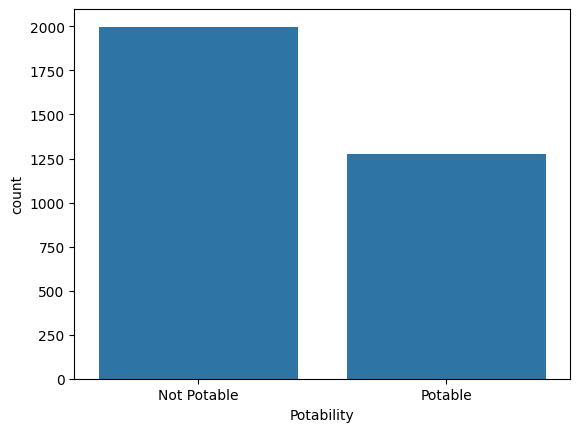

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="Potability", data=df, saturation=0.8)
plt.xticks(ticks=[0,1],labels=["Not Potable", "Potable"])
plt.show()



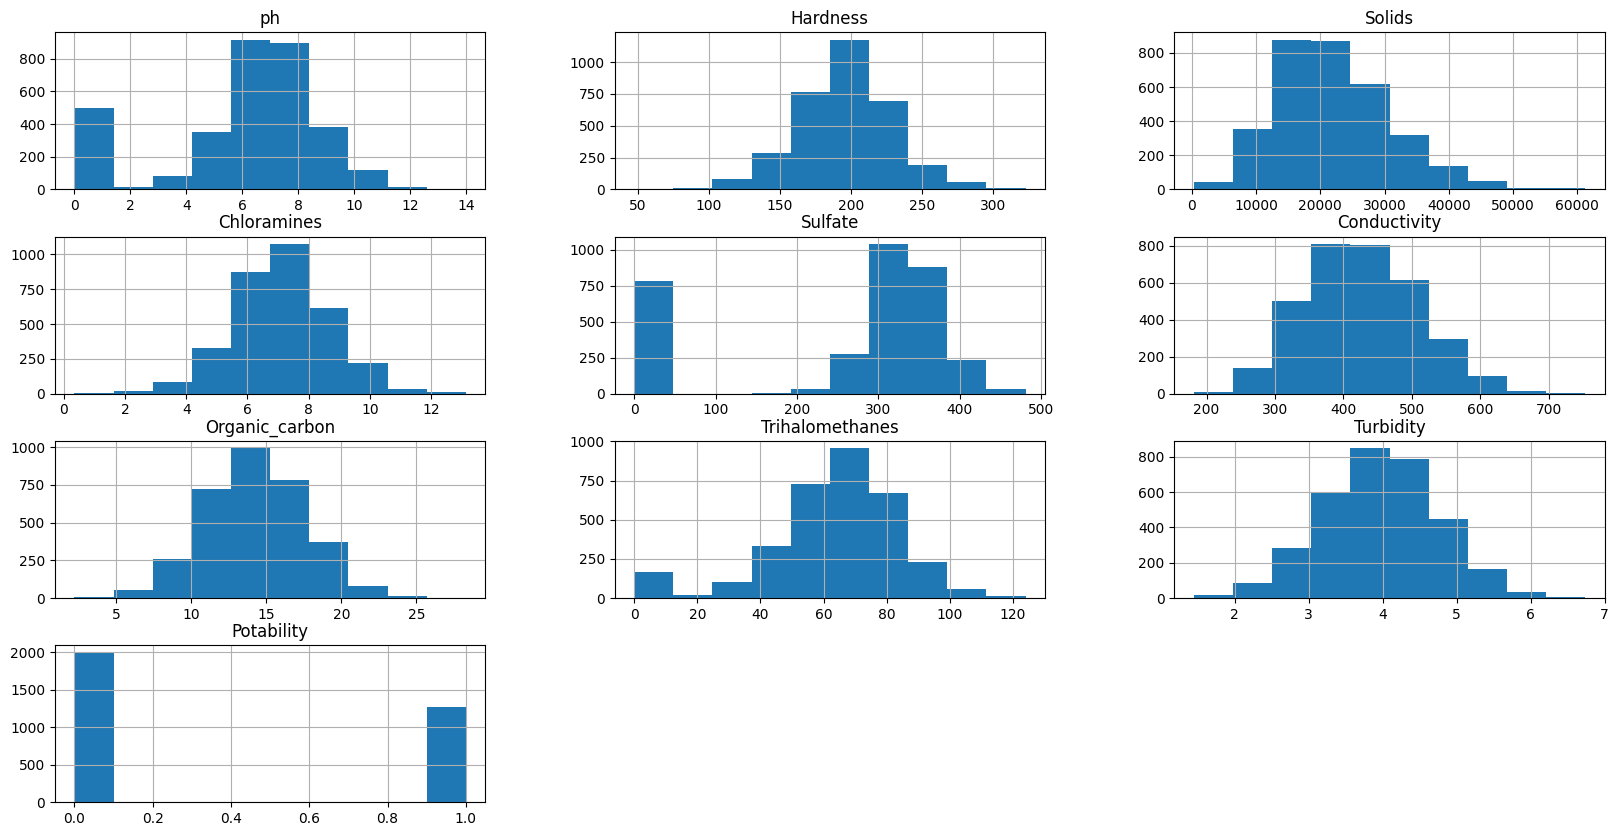

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
X.shape, y.shape

((3276, 9), (3276,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[-2.05883481,  0.25919471, -0.13947087, ..., -1.18065057,
         1.11839374, -1.28629758],
       [-0.78784149, -2.03641367, -0.38598665, ...,  0.27059724,
        -0.31774225,  0.68421789],
       [ 0.7112704 ,  0.84766483, -0.24004734, ...,  0.78111686,
         0.15489886, -1.16736546],
       ...,
       [ 1.16287583, -0.62682923,  1.27080989, ..., -0.98132923,
         0.31533277, -0.85600678],
       [-0.30535229,  1.0413545 , -1.14405809, ..., -0.94206382,
         0.67330539,  0.95079738],
       [ 0.63450186, -0.03854623, -0.52581194, ...,  0.56094007,
         0.72999007, -2.12445866]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

model_lg.fit(X_train, y_train)

In [ ]:
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

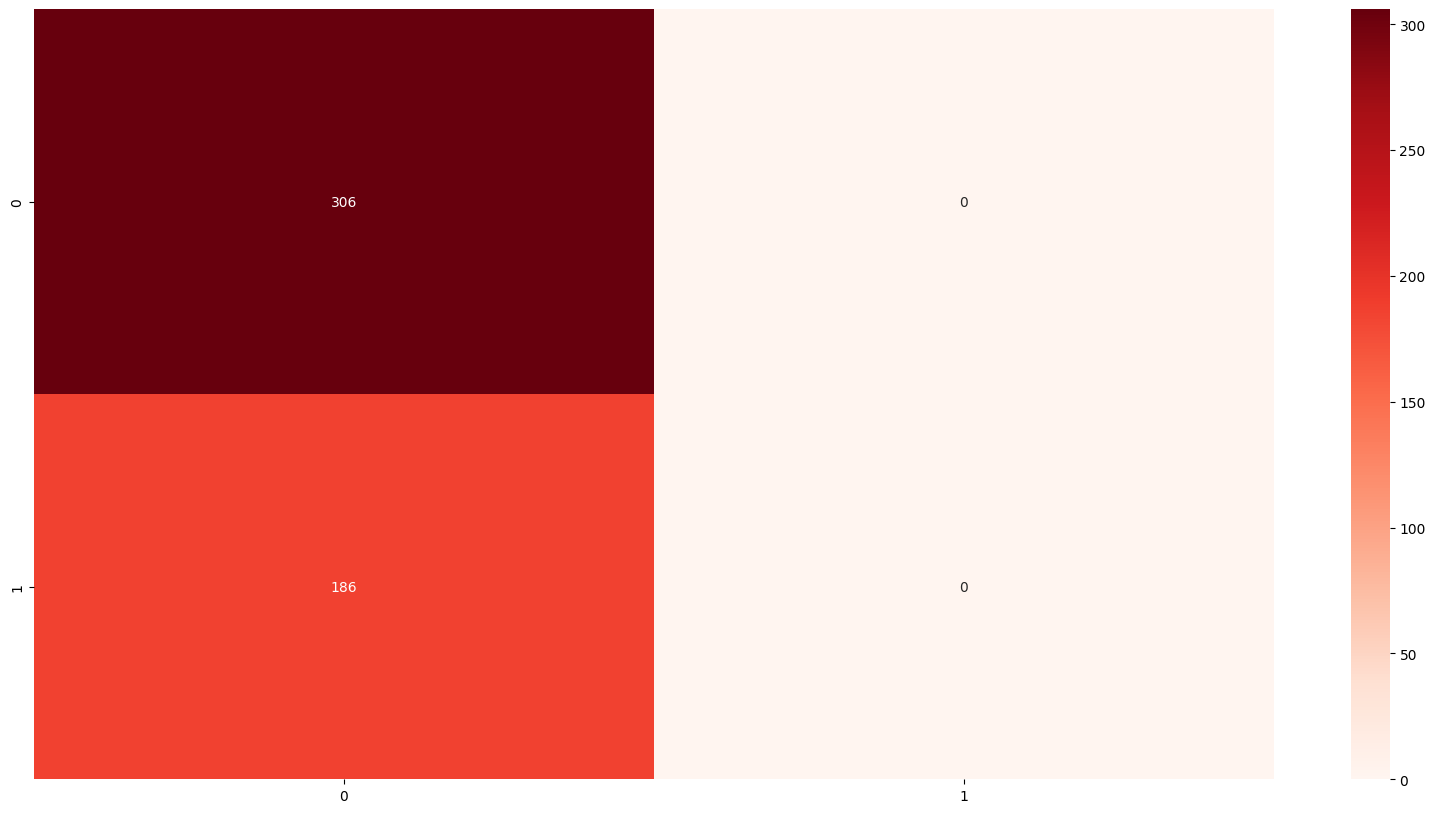

In [ ]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6483739837398373


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.92      0.76       306
           1       0.60      0.21      0.31       186

    accuracy                           0.65       492
   macro avg       0.63      0.56      0.54       492
weighted avg       0.63      0.65      0.59       492



<Axes: >

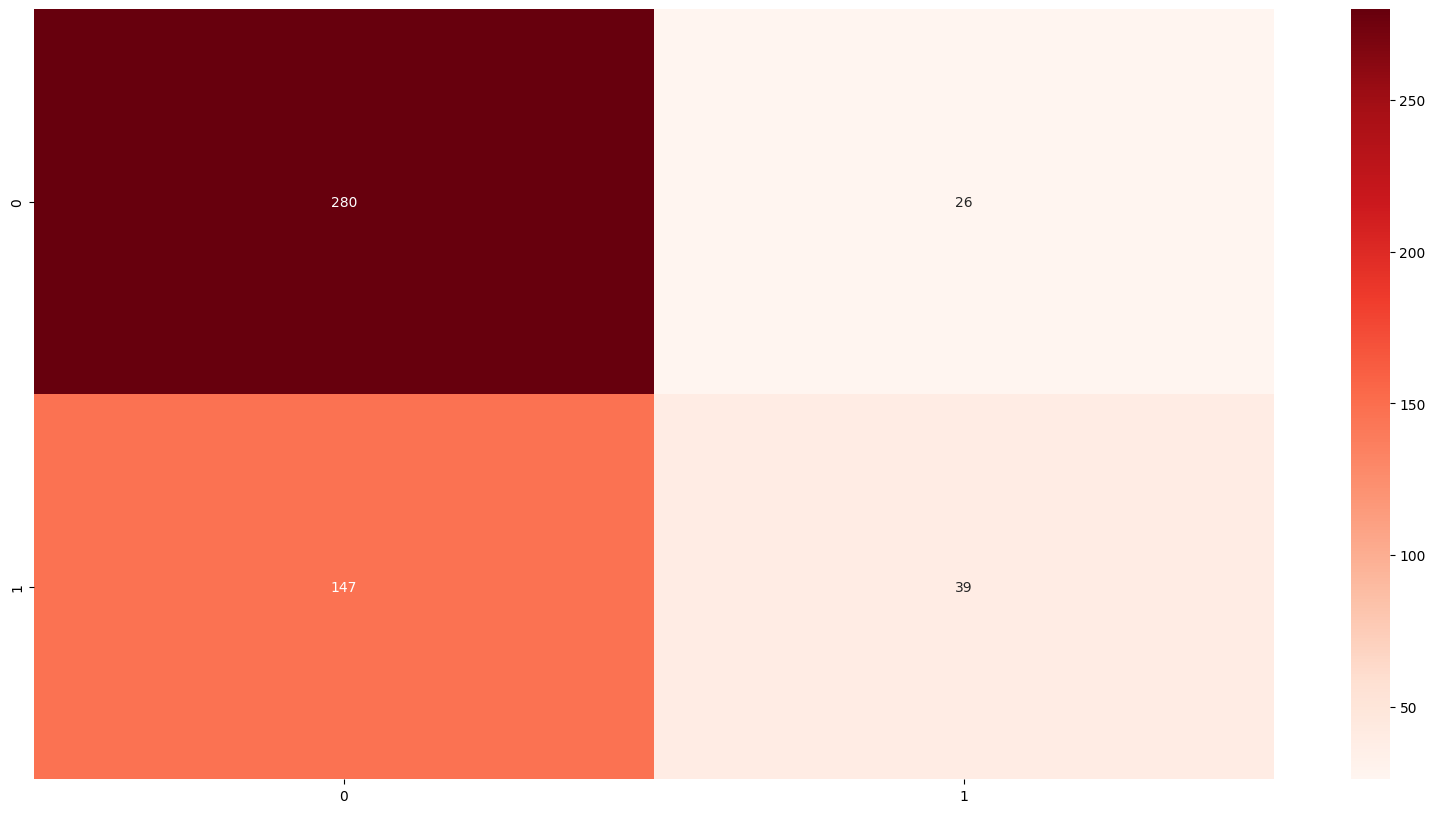

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

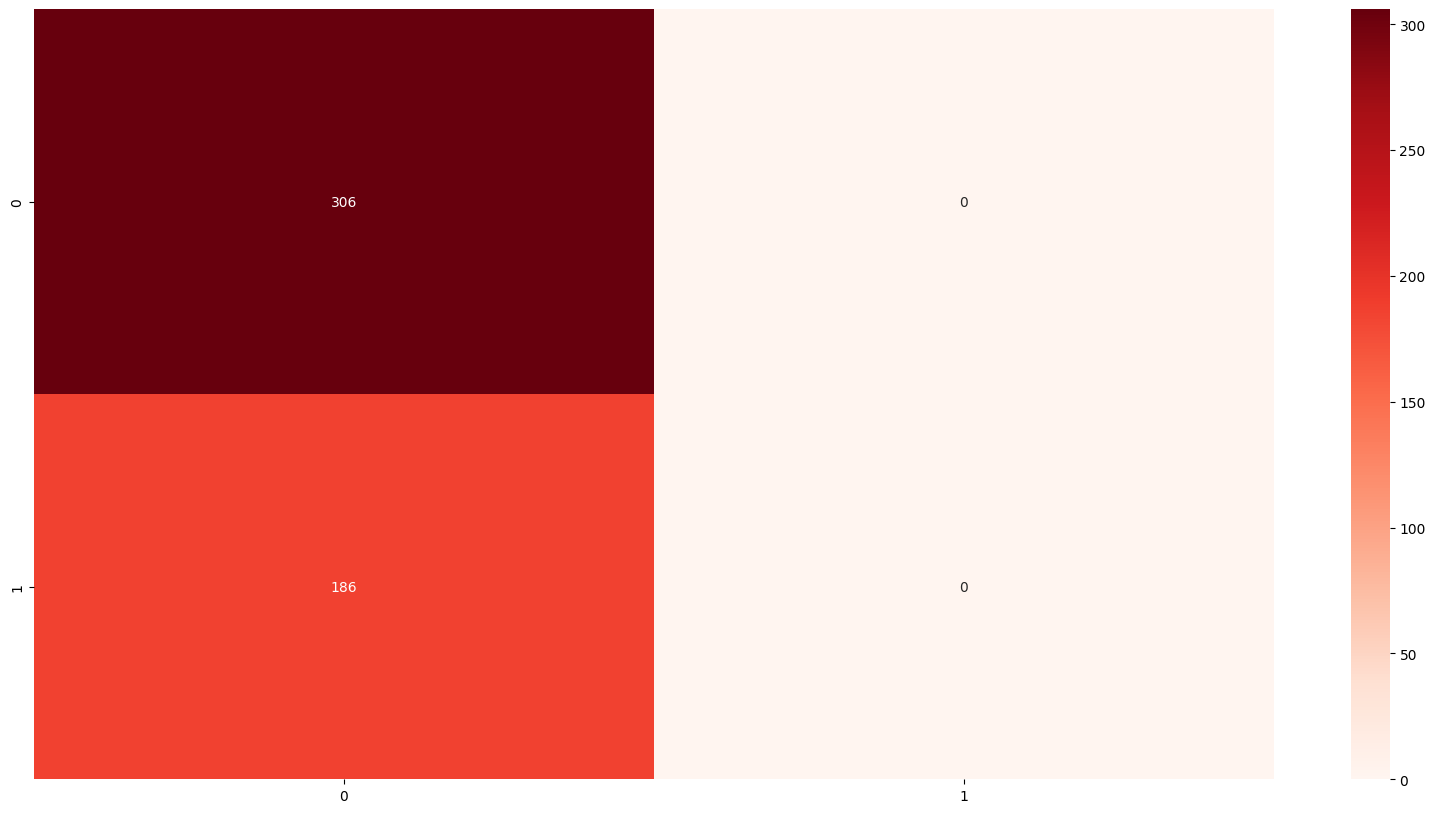

In [ ]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6808943089430894


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       306
           1       0.64      0.37      0.46       186

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492



<Axes: >

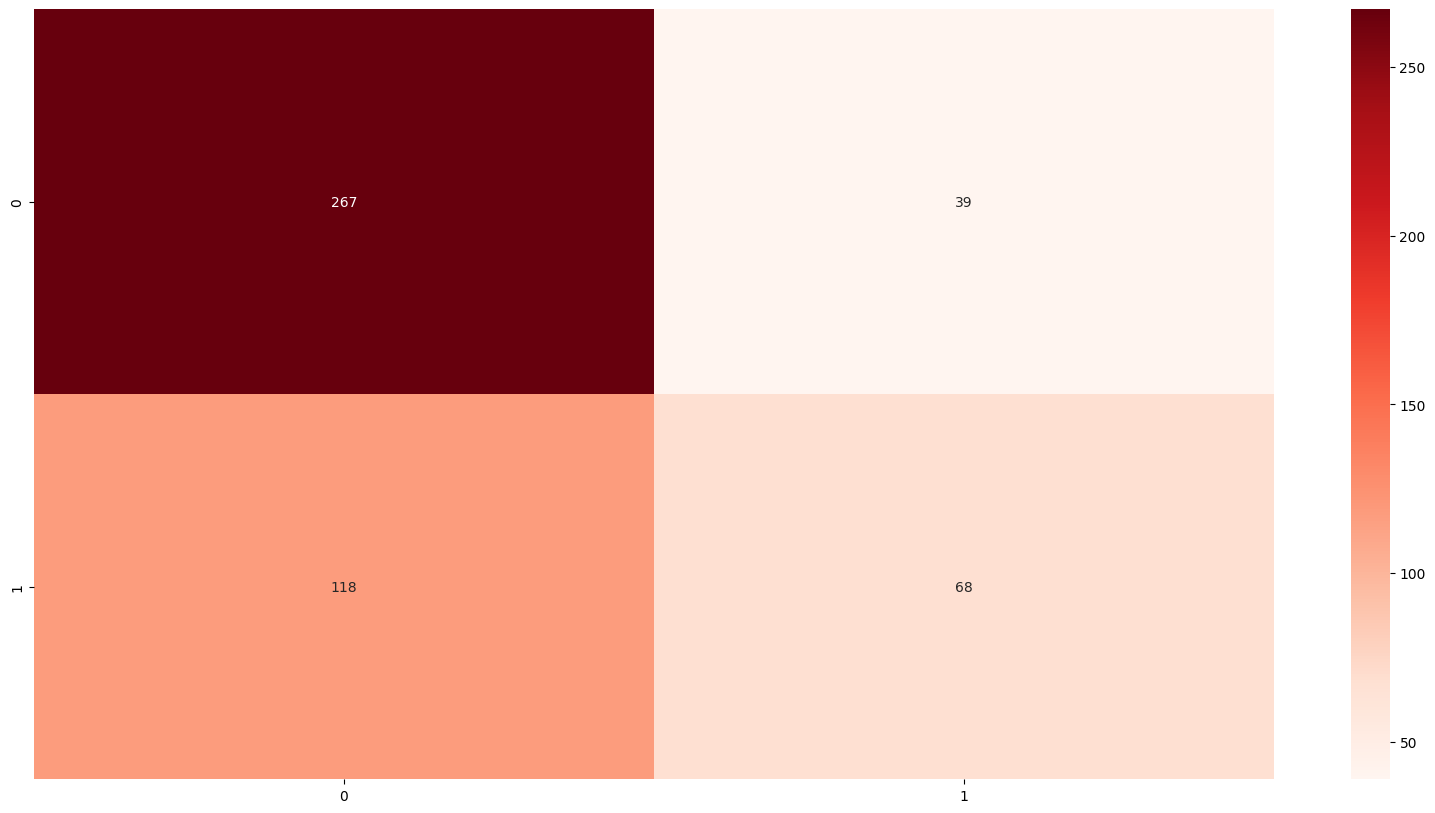

In [ ]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
pred_kn = model_kn.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.5975609756097561


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

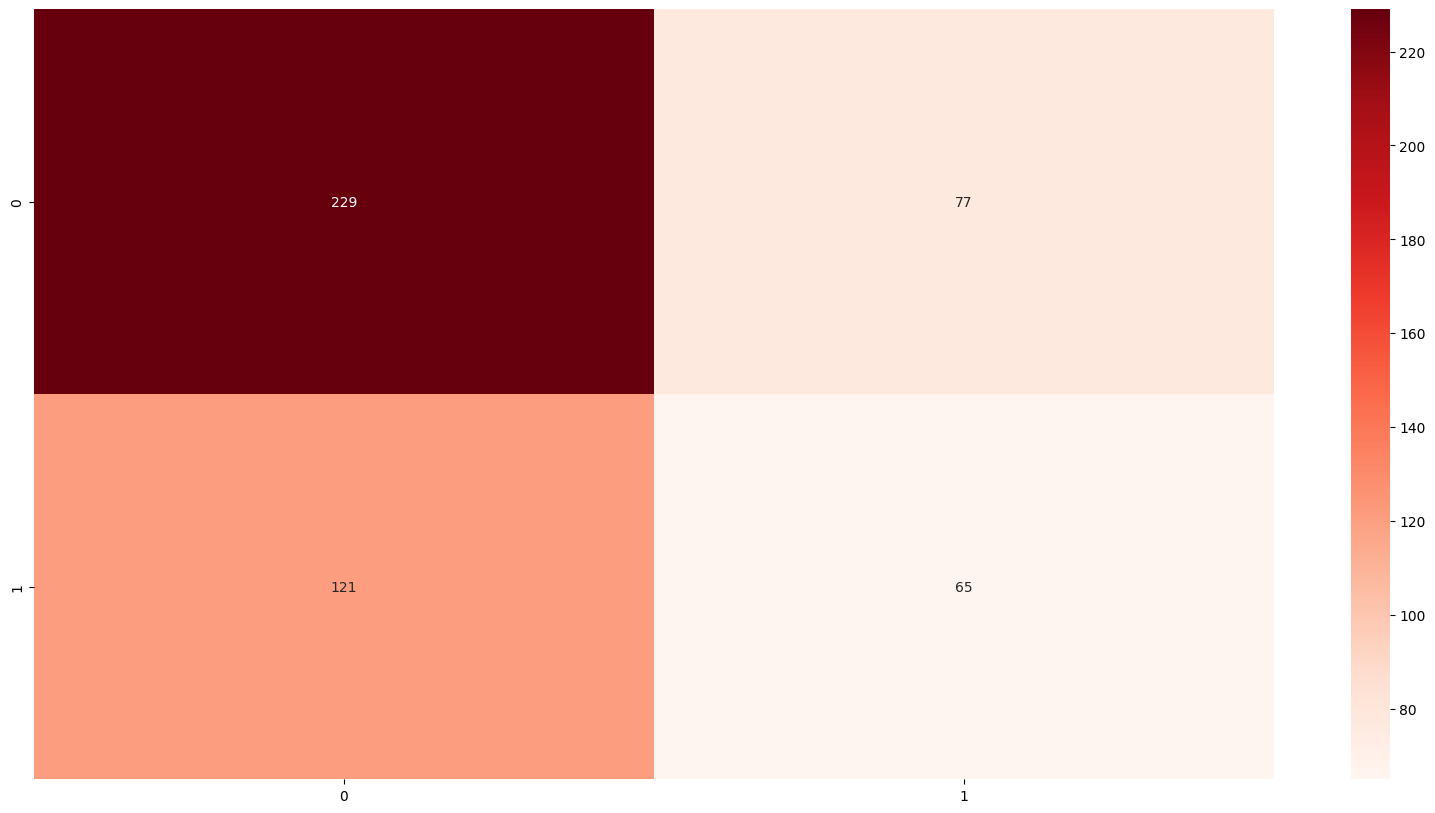

In [ ]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
SVC(random_state=42)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6626016260162602


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

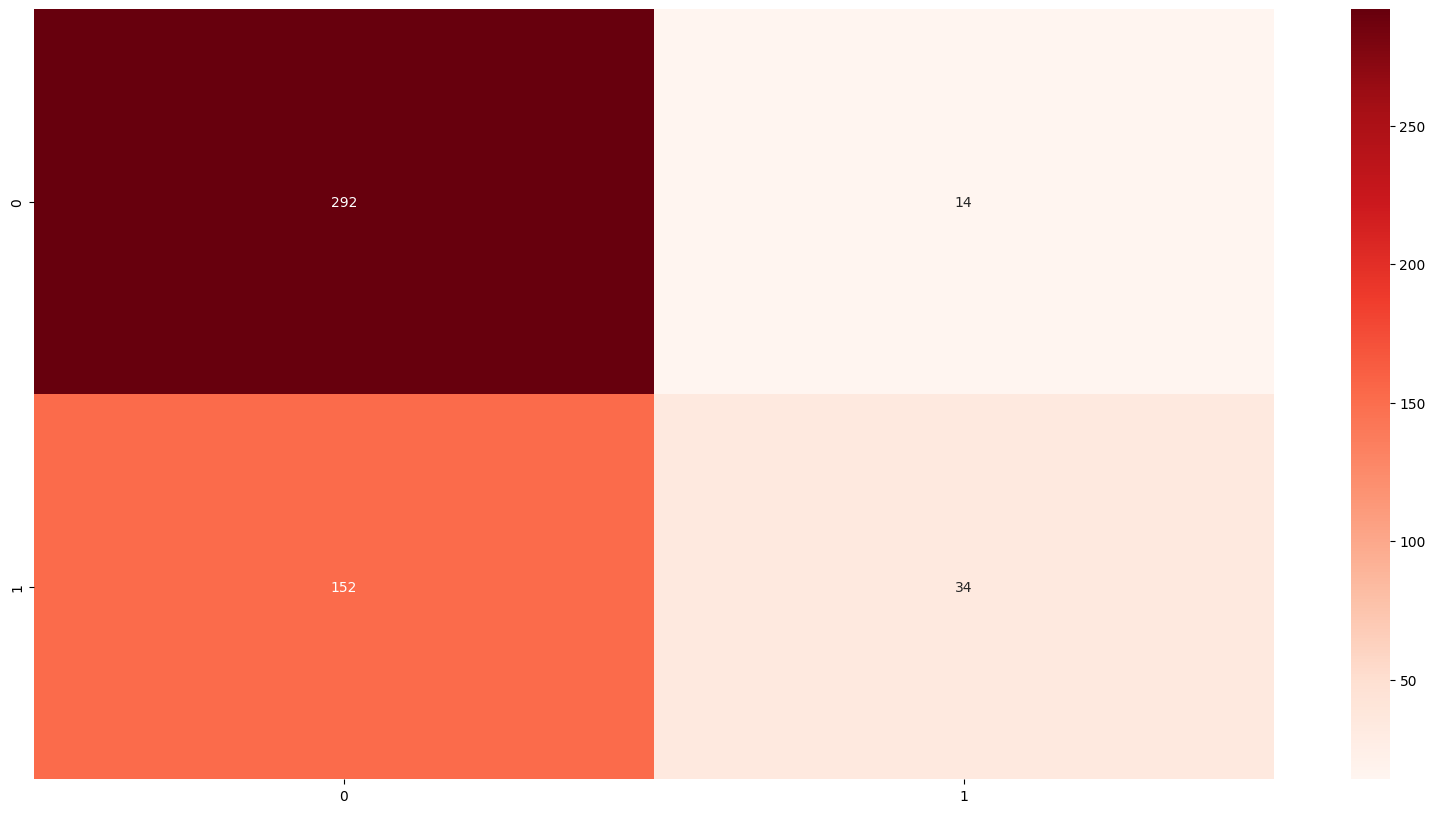

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6, annot = True, fmt=  'g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.6260162601626016


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       1.00      0.01      0.02       186

    accuracy                           0.63       492
   macro avg       0.81      0.51      0.40       492
weighted avg       0.77      0.63      0.49       492



<Axes: >

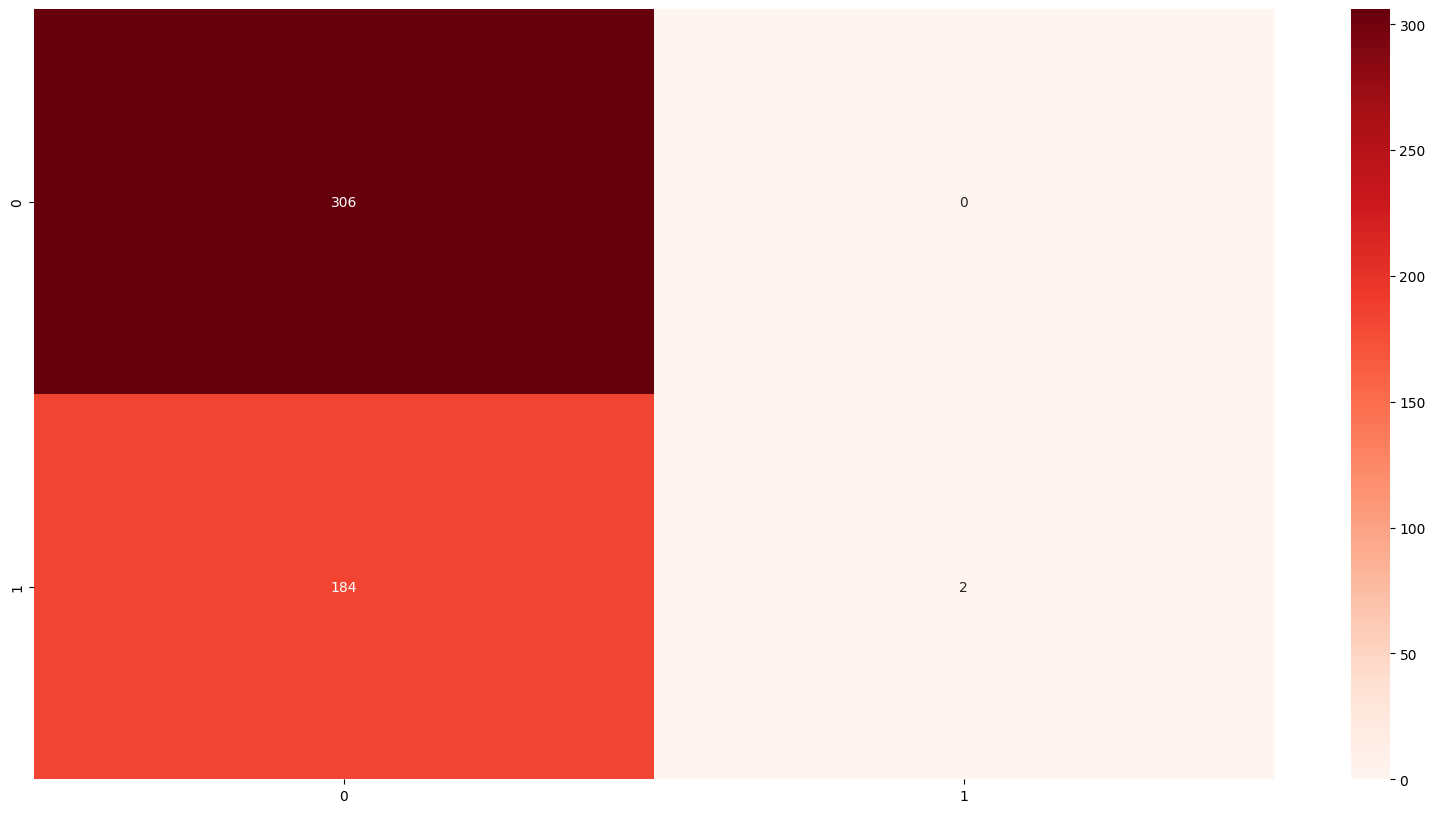

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7, annot = True, fmt=  'g', cmap = 'Reds')

,Model,Accuracy_score
3,XGBoost,0.680894
5,SVM,0.662602
1,Decision Tree,0.648374
6,AdaBoost,0.626016
0,Logistic Regression,0.621951
2,Random Forest,0.621951
4,KNeighbours,0.597561


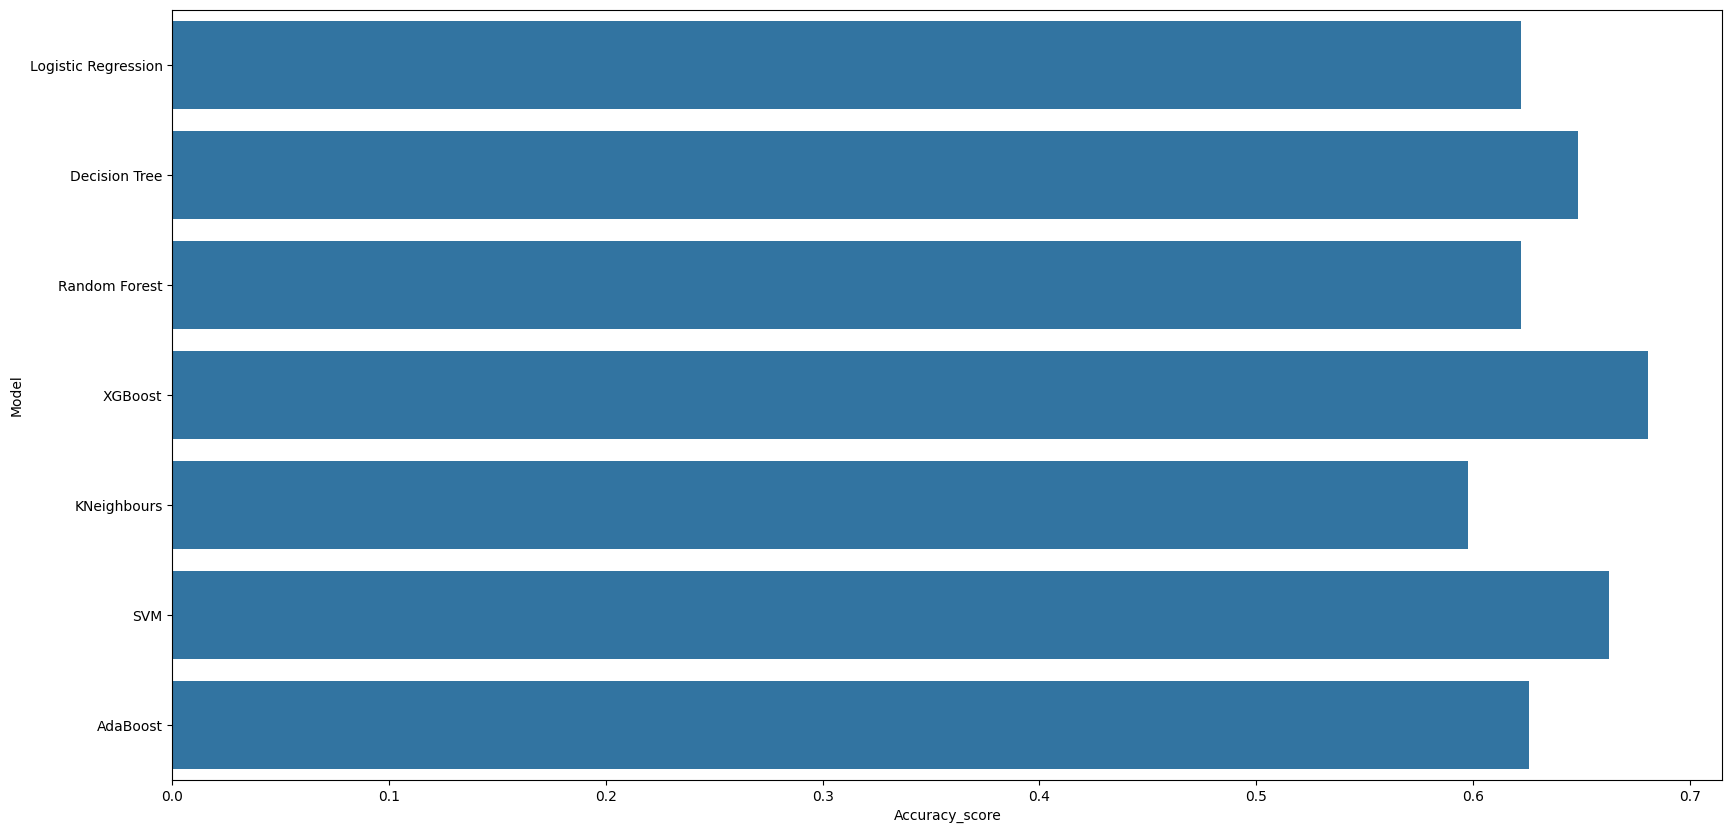

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)